In [81]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [82]:
data_dir =r"C:\Users\ayub_\Downloads\archive (12)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)"
train_dir  = data_dir + '/train'
valid_dir  = data_dir + '/valid'
diseases = os.listdir(train_dir)
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [83]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [84]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1
print(f'Number of different types of plants in our dataset is {str(len(plants))}')
print(f'Total number of Diseases in our dataset are {NumberOfDiseases}')

Number of different types of plants in our dataset is 14
Total number of Diseases in our dataset are 26


In [85]:
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']


In [86]:
# Number of images per Disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/'+disease))
    
img_per_class = pd.DataFrame(nums.values(),index = nums.keys(),columns = ['no. of Images'])
img_per_class

no. of Images
Apple___Apple_scab                                           2016
Apple___Black_rot                                            1987
Apple___Cedar_apple_rust                                     1760
Apple___healthy                                              2008
Blueberry___healthy                                          1816
Cherry_(including_sour)___healthy                            1826
Cherry_(including_sour)___Powdery_mildew                     1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Corn_(maize)___Common_rust_                                  1907
Corn_(maize)___healthy                                       1859
Corn_(maize)___Northern_Leaf_Blight                          1908
Grape___Black_rot                                            1888
Grape___Esca_(Black_Measles)                                 1920
Grape___healthy                                              1692
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Orange___Haunglongbing_(Citrus_greening)                     2010
Peach___Bacterial_spot                                       1838
Peach___healthy                                              1728
Pepper,_bell___Bacterial_spot                                1913
Pepper,_bell___healthy                                       1988
Potato___Early_blight                                        1939
Potato___healthy                                             1824
Potato___Late_blight                                         1939
Raspberry___healthy                                          1781
Soybean___healthy                                            2022
Squash___Powdery_mildew                                      1736
Strawberry___healthy                                         1824
Strawberry___Leaf_scorch                                     1774
Tomato___Bacterial_spot                                      1702
Tomato___Early_blight                                        1920
Tomato___healthy                                             1926
Tomato___Late_blight                                         1851
Tomato___Leaf_Mold                                           1882
Tomato___Septoria_leaf_spot                                  1745
Tomato___Spider_mites Two-spotted_spider_mite                1741
Tomato___Target_Spot                                         1827
Tomato___Tomato_mosaic_virus                                 1790
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961

Text(0.5, 1.0, 'Images per each class of plant disease')

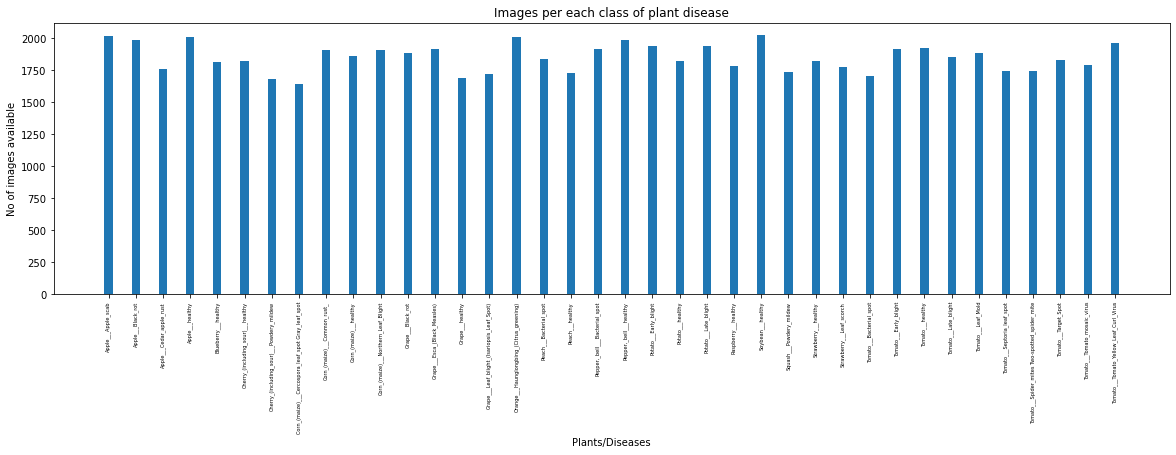

In [87]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

#### We can see that the dataset is almost balanced for all classes, so we are good to go forward

### Total number of images to train

In [88]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


### Data Preparation for training 

In [89]:
%%time
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 

CPU times: total: 1.31 s
Wall time: 2.82 s


#### The ImageFolder class automatically maps the folder structure to class labels. It assigns a unique numerical label to each class based on the alphabetical order of the class folders.

#### When you apply the transforms.ToTensor() transformation to the ImageFolder dataset, it converts each image from a PIL image to a tensor, and during this conversion, the pixel values are automatically divided by 255 to bring them within the range of 0 to 1.

In [90]:
train

Dataset ImageFolder
    Number of datapoints: 70295
    Root location: C:\Users\ayub_\Downloads\archive (12)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)/train
    StandardTransform
Transform: ToTensor()

In [91]:
# example 
img,label = train[0]
print(img.shape,label)

torch.Size([3, 256, 256]) 0


#### We can see the shape (3, 256 256) of the image. 3 is the number of channels (RGB) and 256 x 256 is the width and height of the image

In [92]:
# total number of classes in train set
len(train.classes)

38

In [93]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Apple___Apple_scab(0)


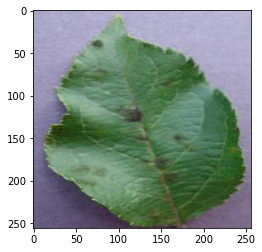

In [94]:
show_image(*train[0])

Label :Strawberry___Leaf_scorch(26)


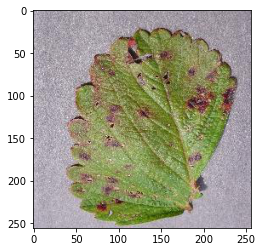

In [95]:
show_image(*train[50000])

Label :Tomato___healthy(37)


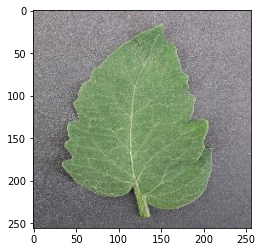

In [96]:
show_image(*train[70000])

#### Lets look at How edges of our Image's looks using Edge detection

In [97]:
import cv2

def edge_detection(image_tensor):
    # Convert the tensor image to numpy array
    image_array = image_tensor.permute(1, 2, 0).detach().cpu().numpy()
    gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    gradient_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    # Normalize the gradient magnitude for visualization
    gradient_magnitude_normalized = (gradient_magnitude - np.min(gradient_magnitude)) / (
        np.max(gradient_magnitude) - np.min(gradient_magnitude)
    )
    
    # Plot the original image and the edge magnitude
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_tensor.permute(1, 2, 0).detach().cpu())
    plt.axis('off')
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(gradient_magnitude_normalized, cmap='gray')
    plt.axis('off')
    plt.title('Edge Detection (Sobel Operator)')
    
    plt.show()

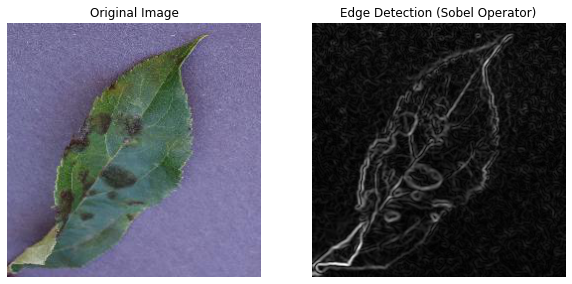

In [98]:
edge_detection(train[50][0])

#### When dealing with large datasets, it's common to use data loaders in PyTorch to efficiently load and preprocess the data in batches during model training. PyTorch's DataLoader class provides an interface to create an iterable dataset that automatically batches the data, shuffles it, and loads it in parallel using multiple processes.

In [99]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)

In [100]:
# setting the batch size
batch_size = 32

In [101]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [102]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

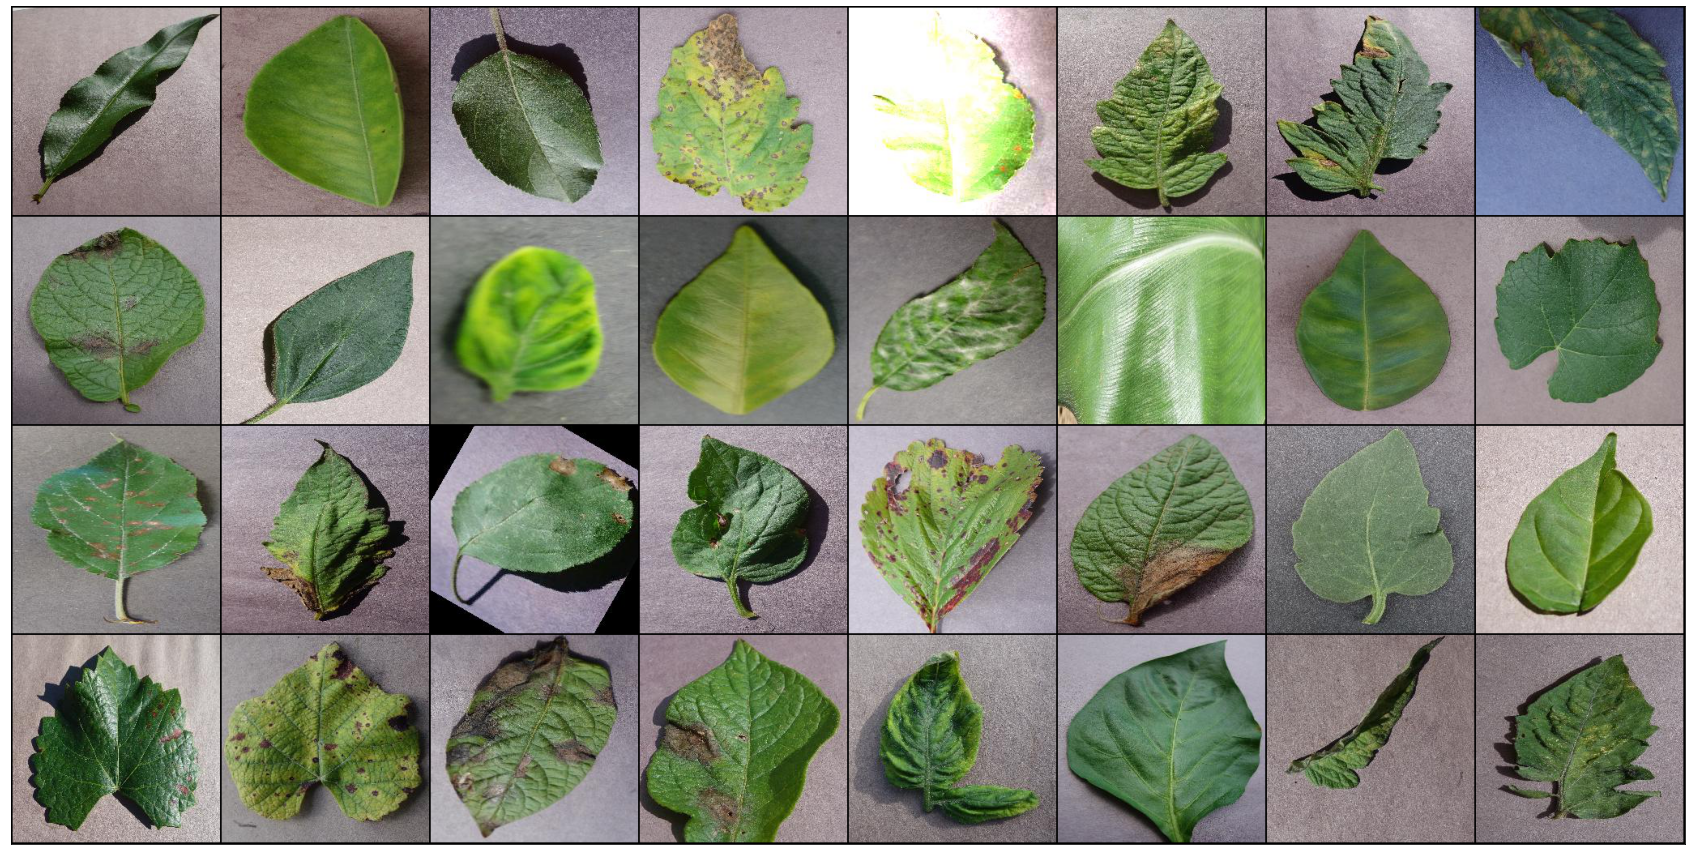

In [103]:
# Images for first batch of training
show_batch(train_dl)

#### So since our dataset is very large and it is very computationally hard and time taking process to run it on cpu, so we use GPU to accelerate our calcuations, and give computational power to our model. But to run out notebook on GPU we need to move our data(variables, objects) from CPU to GPU, and to do so we will write helper functions.

In [104]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

#### Checking the device we are working with

In [105]:
device = get_default_device()
device

device(type='cuda')

#### Wrap up our training and validation data loaders using DeviceDataLoader for automatically transferring batches of data to the GPU (if available)

In [106]:
# Moving data into GPU
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [110]:
train_dl.device

device(type='cuda')

## Modelling

#### Residual Block code implementation

In [111]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x 

In [112]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [113]:
# base class for the model
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss  
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))

### Defining the final architecture of our model

In [114]:
# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)

In [115]:
device = torch.device('cpu')

# Define the to_device function to move tensors to the CPU
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
# resnet architecture 
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out  

#### Now, we define a model object and transfer it into the device with which we are working

In [116]:
# defining the model and moving it to the GPU
model = to_device(ResNet9(3, len(train.classes)), device)


In [117]:
# Move data to the CPU
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(valid_dl, device)

In [118]:
# getting summary of the model
INPUT_SHAPE = (3, 256, 256)
print(summary(model.cpu(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
       BatchNorm2d-9          [-1, 128, 64, 64]             256
             ReLU-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]         147,584
      BatchNorm2d-12          [-1, 128, 64, 64]             256
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 256,

In [119]:
# for training
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)



def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
            
    
        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history

#### Let's check our validation loss and accuracy

In [121]:

history

import pandas as pd
soil=pd.read_csv(r'C:\Users\ayub_\AppData\Local\Temp\Temp2_archive (10).zip\dataset.csv')
fertilizer=pd.read_csv(r'C:\Users\ayub_\AppData\Local\Temp\Temp1_archive (13).zip\Fertilizer Prediction.csv')
soil.info()
fertilizer.info()
soil.isna().sum()
fertilizer.isna().sum()
soil.columns
fertlizer.columns
fertilizer.columns
import os
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch

In [63]:
epochs = 2
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

##### PLOTTING

In [122]:
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

    
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'].cpu() if isinstance(x['val_loss'], torch.Tensor) else None for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');


def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

#### Validation Accuracy

In [66]:
plot_accuracies(history)

NameError: name 'history' is not defined

### Testing model on test data

#### We only have 33 images in test data, so let's check the model on all images

In [124]:
test_dir = r"C:\Users\ayub_\Downloads\archive (12)\test"
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [125]:
test_images = sorted(os.listdir(test_dir + '/test')) # since images in test folder are in alphabetical order
test_images

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

In [126]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

Label: AppleCedarRust1.JPG , Predicted: Pepper,_bell___healthy


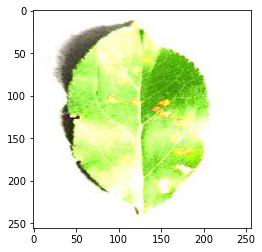

In [127]:
# predicting first image
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [128]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

Label: AppleCedarRust1.JPG , Predicted: Pepper,_bell___healthy
Label: AppleCedarRust2.JPG , Predicted: Pepper,_bell___healthy
Label: AppleCedarRust3.JPG , Predicted: Pepper,_bell___healthy
Label: AppleCedarRust4.JPG , Predicted: Pepper,_bell___healthy
Label: AppleScab1.JPG , Predicted: Pepper,_bell___healthy
Label: AppleScab2.JPG , Predicted: Pepper,_bell___healthy
Label: AppleScab3.JPG , Predicted: Pepper,_bell___healthy
Label: CornCommonRust1.JPG , Predicted: Pepper,_bell___healthy
Label: CornCommonRust2.JPG , Predicted: Pepper,_bell___healthy
Label: CornCommonRust3.JPG , Predicted: Pepper,_bell___healthy
Label: PotatoEarlyBlight1.JPG , Predicted: Pepper,_bell___healthy
Label: PotatoEarlyBlight2.JPG , Predicted: Pepper,_bell___healthy
Label: PotatoEarlyBlight3.JPG , Predicted: Pepper,_bell___healthy
Label: PotatoEarlyBlight4.JPG , Predicted: Pepper,_bell___healthy
Label: PotatoEarlyBlight5.JPG , Predicted: Pepper,_bell___healthy
Label: PotatoHealthy1.JPG , Predicted: Pepper,_bell___h